In [14]:
from pathlib import Path
import pandas as pd
import numpy as np
from import_clean_data import load_annotated_meter_data, load_co2_data
from load_dayahead_prices import load_dayahead_prices
import warnings
import matplotlib.pyplot as plt

In [15]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [16]:
dayahead_2020_filename = "Day-ahead Prices_202001010000-202101010000.csv"
dayahead_2021_filename = "Day-ahead Prices_202101010000-202201010000.csv"

In [17]:
dayahead_2020 = load_dayahead_prices(DATA_DIR / dayahead_2020_filename)
dayahead_2021 = load_dayahead_prices(DATA_DIR / dayahead_2021_filename)

In [18]:
dayahead_2020

,Day-ahead Price [EUR/MWh],BZN|CH,datetime
0,35.419998,NaN,2019-12-31 23:00:00+00:00
1,34.040001,NaN,2020-01-01 00:00:00+00:00
2,31.520000,NaN,2020-01-01 01:00:00+00:00
3,28.290001,NaN,2020-01-01 02:00:00+00:00
4,26.920000,NaN,2020-01-01 03:00:00+00:00
...,...,...,...
8780,58.490002,NaN,2020-12-31 18:00:00+00:00
8781,56.139999,NaN,2020-12-31 19:00:00+00:00
8782,52.980000,NaN,2020-12-31 20:00:00+00:00
8783,52.310001,NaN,2020-12-31 21:00:00+00:00


In [19]:
dayahead = pd.concat([dayahead_2020, dayahead_2021])

In [20]:
dayahead.drop(["BZN|CH"], axis=1, inplace=True)

In [21]:
dayahead  = dayahead[dayahead['Day-ahead Price [EUR/MWh]'].notna()]

In [22]:
dayahead.dtypes

Day-ahead Price [EUR/MWh]                float32
datetime                     datetime64[ns, UTC]
dtype: object

In [23]:
mondays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 0]
tuesdays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 1]
wednesdays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 2]
thursdays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 3]
fridays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 4]
saturdays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 5]
sundays = dayahead.loc[dayahead['datetime'].dt.dayofweek == 6]

In [24]:
# Calculate price per hour of average weekday
days = [mondays, tuesdays, wednesdays, thursdays, fridays, saturdays, sundays]
result = {}

j = 0
for day in days:
    hours = []
    
    for i in range(24):
        thishour = day.loc[day['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['Day-ahead Price [EUR/MWh]'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1

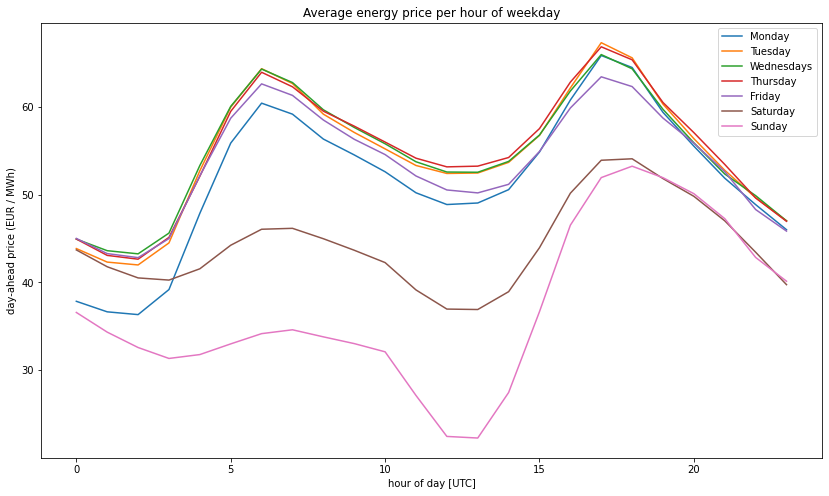

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(result['0'], label="Monday")
plt.plot(result['1'], label="Tuesday")
plt.plot(result['2'], label="Wednesdays")
plt.plot(result['3'], label="Thursday")
plt.plot(result['4'], label="Friday")
plt.plot(result['5'], label="Saturday")
plt.plot(result['6'], label="Sunday")
plt.title("Average energy price per hour of weekday")
plt.ylabel("day-ahead price (EUR / MWh)")
plt.xlabel("hour of day [UTC]")
plt.legend()
plt.savefig("daily_dayahead_price.png", dpi=300)

In [26]:
# per month
Jan = dayahead.loc[dayahead['datetime'].dt.month == 1]
Feb = dayahead.loc[dayahead['datetime'].dt.month == 2]
Mar = dayahead.loc[dayahead['datetime'].dt.month == 3]
Apr = dayahead.loc[dayahead['datetime'].dt.month == 4]
Mai = dayahead.loc[dayahead['datetime'].dt.month == 5]
Jun = dayahead.loc[dayahead['datetime'].dt.month == 6]
Jul = dayahead.loc[dayahead['datetime'].dt.month == 7]
Aug = dayahead.loc[dayahead['datetime'].dt.month == 8]
Sep = dayahead.loc[dayahead['datetime'].dt.month == 9]
Okt = dayahead.loc[dayahead['datetime'].dt.month == 10]
Nov = dayahead.loc[dayahead['datetime'].dt.month == 11]
Dez = dayahead.loc[dayahead['datetime'].dt.month == 12]

In [27]:
# Calculate average price per month
months = [Jan, Feb, Mar, Apr, Mai, Jun, Jul, Aug, Sep, Okt, Nov, Dez]
result = {}

j = 0
for month in months:
    hours = []
    
    for i in range(24):
        thishour = month.loc[month['datetime'].dt.hour == i]
        number = len(thishour.index)
        avg = thishour['Day-ahead Price [EUR/MWh]'].sum() / number
        hours.append(avg)
        
    result[str(j)] = hours
    j += 1

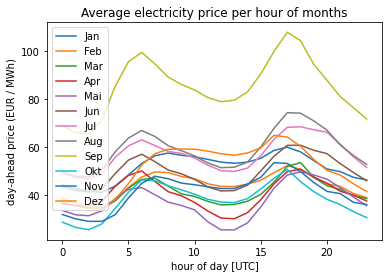

In [28]:
plt.plot(result['0'], label="Jan")
plt.plot(result['1'], label="Feb")
plt.plot(result['2'], label="Mar")
plt.plot(result['3'], label="Apr")
plt.plot(result['4'], label="Mai")
plt.plot(result['5'], label="Jun")
plt.plot(result['6'], label="Jul")
plt.plot(result['7'], label="Aug")
plt.plot(result['8'], label="Sep")
plt.plot(result['9'], label="Okt")
plt.plot(result['10'], label="Nov")
plt.plot(result['11'], label="Dez")
plt.title("Average electricity price per hour of months")
plt.ylabel("day-ahead price (EUR / MWh)")
plt.xlabel("hour of day [UTC]")
plt.legend();

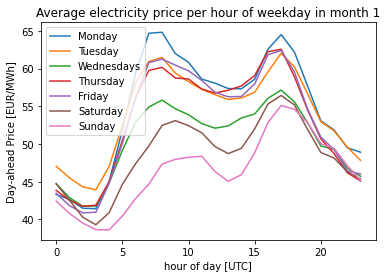

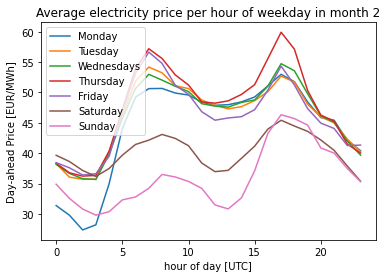

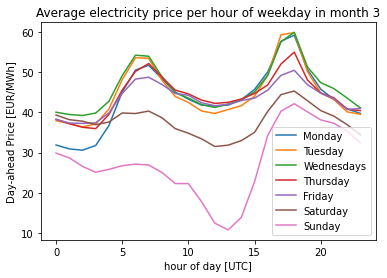

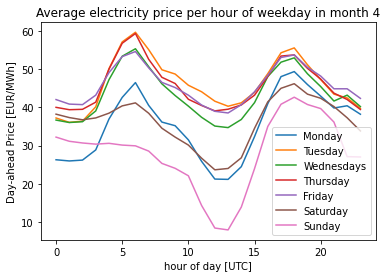

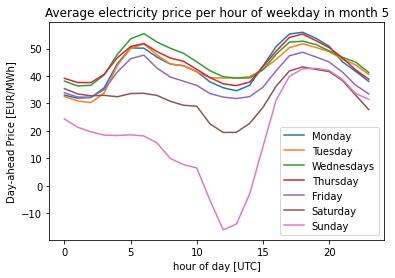

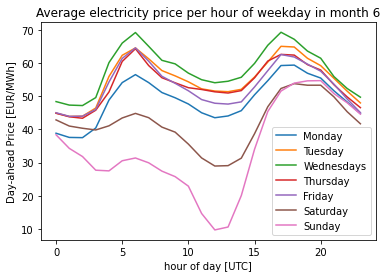

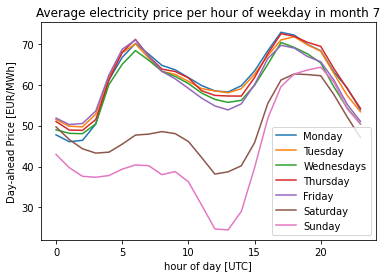

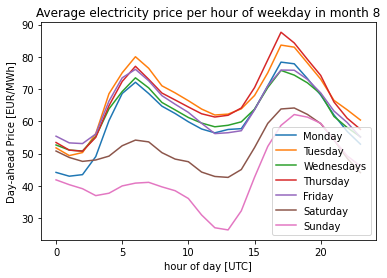

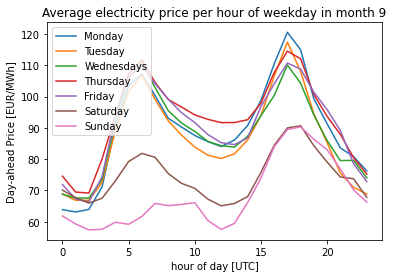

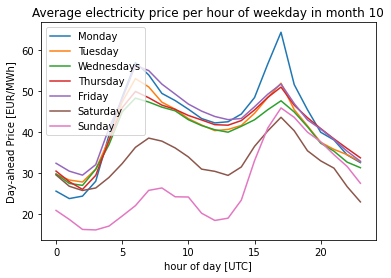

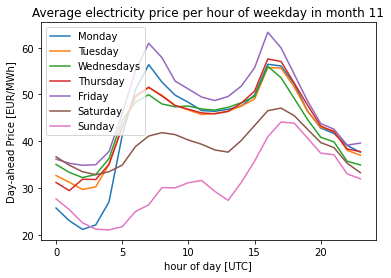

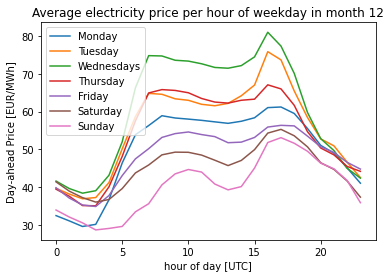

In [30]:
# for every weekday, plot all months
monthcount = 1

for month in months:
    mondays = month.loc[month['datetime'].dt.dayofweek == 0]
    tuesdays = month.loc[month['datetime'].dt.dayofweek == 1]
    wednesdays = month.loc[month['datetime'].dt.dayofweek == 2]
    thursdays = month.loc[month['datetime'].dt.dayofweek == 3]
    fridays = month.loc[month['datetime'].dt.dayofweek == 4]
    saturdays = month.loc[month['datetime'].dt.dayofweek == 5]
    sundays = month.loc[month['datetime'].dt.dayofweek == 6]
    
    # Calculate average co2_intensity per weekday
    days = [mondays, tuesdays, wednesdays, thursdays, fridays, saturdays, sundays]
    result = {}

    j = 0
    for day in days:
        hours = []

        for i in range(24):
            thishour = day.loc[day['datetime'].dt.hour == i]
            number = len(thishour.index)
            avg = thishour['Day-ahead Price [EUR/MWh]'].sum() / number
            hours.append(avg)

        result[str(j)] = hours
        j += 1
        
    # plot
    plt.figure()
    plt.plot(result['0'], label="Monday")
    plt.plot(result['1'], label="Tuesday")
    plt.plot(result['2'], label="Wednesdays")
    plt.plot(result['3'], label="Thursday")
    plt.plot(result['4'], label="Friday")
    plt.plot(result['5'], label="Saturday")
    plt.plot(result['6'], label="Sunday")
    plt.title("Average electricity price per hour of weekday in month " + str(monthcount))
    plt.ylabel("Day-ahead Price [EUR/MWh]")
    plt.xlabel("hour of day [UTC]")
    plt.legend()
    
    monthcount += 1
    
plt.show()